In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import sys
import json
import codecs

%matplotlib inline
sys.path.append('../')

from models.Problem_Class import OptimalControl, OptimalControlConvex
from opt_algos.projected_gradient_descent import projected_gradient_descent, projector
from opt_algos.projected_accelerated_gradient_descent import accelerated_gradient_descent
from opt_algos.ADAGRAD import ADAGRAD_plus
from opt_algos.ADAAGD import ADAAGD_plus

# Objective functions plots

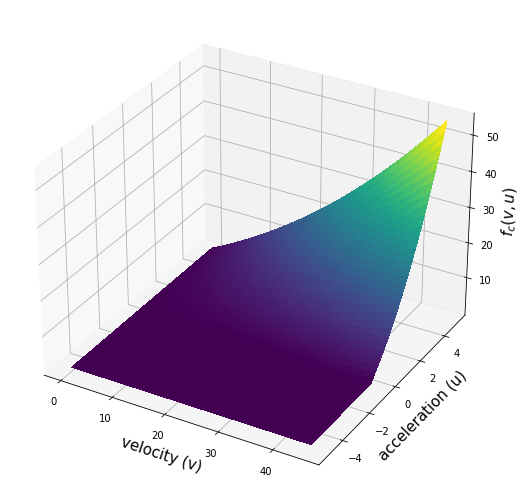

In [2]:
model_full = OptimalControl([0], 0, 0, 0, 0)
v = np.linspace(0, 45, 500)
a = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(v, a)
fc = model_full.fuel_model(X, Y)
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.grid()

ax.plot_surface(X, Y, fc, cmap='viridis', edgecolor='none', linewidth=0, antialiased=False)
ax.set_zlabel(r'$f_c(v, u)$', fontsize=15)
ax.set_xlabel('velocity (v)', fontsize=15)
ax.set_ylabel('acceleration (u)', fontsize=15)
plt.savefig("results/obj_1.png", dpi = 450)

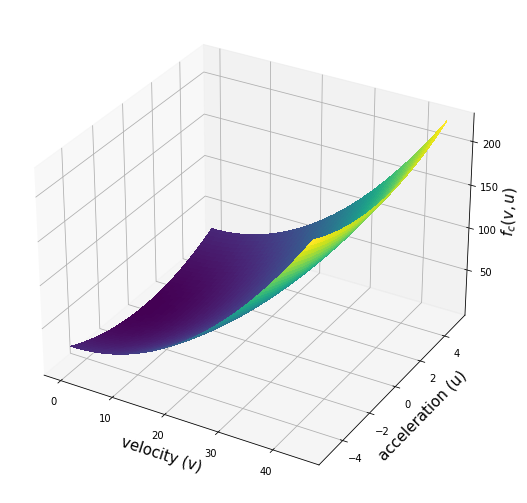

In [3]:
model_full = OptimalControl([0], 0, 0, 0, 0)
v = np.linspace(0, 45, 500)
a = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(v, a)
fc = 1e-1 * X**2 + Y**2
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.grid()

ax.plot_surface(X, Y, fc, cmap='viridis', edgecolor='none', linewidth=0, antialiased=False)
ax.set_zlabel(r'$f_c(v, u)$', fontsize=15)
ax.set_xlabel('velocity (v)', fontsize=15)
ax.set_ylabel('acceleration (u)', fontsize=15)
plt.savefig("results/obj_2.png", dpi = 450)

# Import data

In [4]:
files = glob.glob("traffic_data/*.csv")
data = {}
for i, file in enumerate(files): 
    temp = pd.read_csv(file)
    temp = temp[2000:3500]
    data[i] = {}
    v = np.array(temp.Velocity)*(1000/3600)
    data[i]["time"] = np.array(temp.Time) - min(temp.Time)
    data[i]["vl"] = np.array(temp.Velocity)*(1000/3600)
    data[i]["xl"] = np.array(temp.DistanceGPS) - min(np.array(temp.DistanceGPS)) + 2 * v[0]
    s = np.diff(v)
    data[i]["u0"] = np.append(s, s[-1])/0.1
    data[i]["y0"] = [0, v[0]]

# velocity = 30 * np.ones(time.shape)
# position = 20 + np.multiply(time, velocity) 


In [5]:
files

['traffic_data/2021-03-24-12-39-15_2T3MWRFVXLW056972_masterArray_0_6438.csv',
 'traffic_data/2021-04-15-21-32-46_2T3MWRFVXLW056972_masterArray_1_3685.csv',
 'traffic_data/2021-04-22-12-47-13_2T3MWRFVXLW056972_masterArray_0_7050.csv']

# Trajectories plots

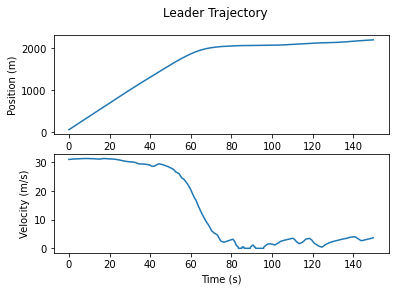

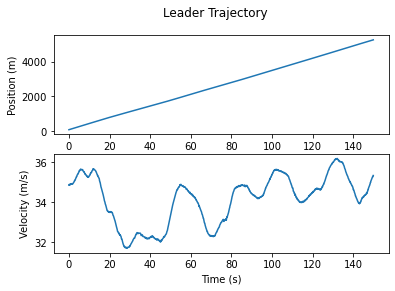

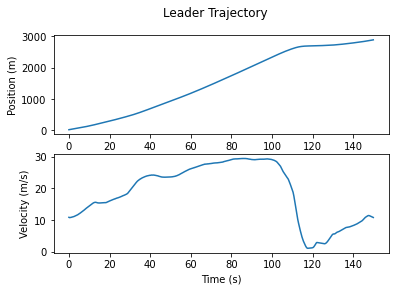

In [41]:
for i in data.keys():
    fig, axs = plt.subplots(2)
    fig.suptitle('Leader Trajectory')
    axs[0].plot(data[i]["time"], data[i]["xl"])
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Position (m)")
    axs[1].plot(data[i]["time"], data[i]["vl"])
    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Velocity (m/s)")
    plt.savefig("results/traj{}.png".format(i), dpi = 450)

# Run algorithms

In [6]:
## General params
max_iterations= 1e3
epsilon=1e-6

Algorithm 3: ADAGRAD+

10
Objective value =  136.00485750365038
Objective value =  122.10429512890772
Objective value =  118.99697583421344
Objective value =  118.75220564594754
Objective value =  118.71479003423744
Objective value =  118.22377295467241
Objective value =  118.05196095289585
Objective value =  117.73351777354586
Objective value =  117.53236321559538
Objective value =  117.43570970596068
Objective value =  117.46718716384848
Objective value =  117.35054762615808
Objective value =  117.25344071182879
Objective value =  117.13912348191124
Objective value =  117.06052812961339
Objective value =  117.00769043665414
Objective value =  116.95455014301565
Objective value =  116.90955915736095
Objective value =  116.86445053673596
Objective value =  116.80540504482225
Objective value =  116.80222234391879
Objective value =  116.78118894401395
Objective value =  116.74573212624833
Objective value =  116.69600615877044
Objective value =  116.66606200564016
Objective value =  116.64215280888858
Objective

Objective value =  115.8449537770051
Objective value =  115.84892787585552
Objective value =  115.84944260649561
Objective value =  115.84960705332436
Objective value =  115.84900449023715
Objective value =  115.84662218454507
Objective value =  115.84409681382375
Objective value =  115.84083929913098
Objective value =  115.83726363285912
Objective value =  115.83663402840763
Objective value =  115.8350346651714
Objective value =  115.83112990821651
Objective value =  115.83219682039937
Objective value =  115.83018248518025
Objective value =  115.83010575177005
Objective value =  115.82731625229142
Objective value =  115.82666257138101
Objective value =  115.82379496036506
Objective value =  115.82079207769257
Objective value =  115.81937805721974
Objective value =  115.8166799206197
Objective value =  115.81464722119092
Objective value =  115.81317704238522
Objective value =  115.81118646158609
Objective value =  115.81034426681434
Objective value =  115.81120282533125
Objective value

Objective value =  115.70015210604508
Objective value =  115.69889142901462
Objective value =  115.7313843724604
Objective value =  115.7119498785844
Objective value =  115.70813296538036
Objective value =  115.70177398647864
Objective value =  115.70135156104017
Objective value =  115.70295254125786
Objective value =  115.704853068654
Objective value =  115.70353236715387
Objective value =  115.7030871764181
Objective value =  115.70246852041024
Objective value =  115.70156632215888
Objective value =  115.70095867135736
Objective value =  115.70022951564054
Objective value =  115.6999028360623
Objective value =  115.70104180962655
Objective value =  115.70053133872786
Objective value =  115.7001454167394
Objective value =  115.69951928939902
Objective value =  115.70002791725234
Objective value =  115.69904849681274
Objective value =  115.69860309573662
Objective value =  115.69863653165115
Objective value =  115.69813805955305
Objective value =  115.69817652018709
Objective value =  

Objective value =  115.65050499813545
Objective value =  115.65099139926373
Objective value =  115.65027292764992
Objective value =  115.649614372482
Objective value =  115.65034448451311
Objective value =  115.6503202607171
Objective value =  115.65067127355647
Objective value =  115.65048164065922
Objective value =  115.65019184199502
Objective value =  115.64971472576968
Objective value =  115.64965868019071
Objective value =  115.6502852537053
Objective value =  115.64988964340338
Objective value =  115.65022117004081
Objective value =  115.64870959257863
Objective value =  115.6478268679995
Objective value =  115.64760363804466
Objective value =  115.6474509730978
Objective value =  115.64714955764245
Objective value =  115.64595665841289
Objective value =  115.6454122141213
Objective value =  115.64519563534553
Objective value =  115.64447572438088
Objective value =  115.64357994416045
Objective value =  115.64225331003531
Objective value =  115.64261348981607
Objective value =  

Objective value =  115.62008605379948
Objective value =  115.62065365373671
Objective value =  115.62068635869447
Objective value =  115.6202689135554
Objective value =  115.61987047374355
Objective value =  115.61986151747341
Objective value =  115.62038063709318
Objective value =  115.62036214289907
Objective value =  115.62010114114138
Objective value =  115.6196493360305
Objective value =  115.61912993242314
Objective value =  115.61833368336416
Objective value =  115.6191705459177
Objective value =  115.61914239826069
Objective value =  115.61883399458142
Objective value =  115.61849655493818
Objective value =  115.61808990353481
Objective value =  115.61827614374464
Objective value =  115.61873038794693
Objective value =  115.61860875245617
Objective value =  115.61884454184124
Objective value =  115.61924279373133
Objective value =  115.61882339231845
Objective value =  115.61855909380695
Objective value =  115.61829950683786
Objective value =  115.61875248834247
Objective value

NameError: name 'sol' is not defined

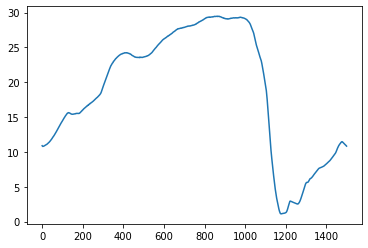

In [8]:
## Original Objective 
i = 2
exp_name = "original_ADAGRAD_{}".format(i)
model = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_3_2 = ADAGRAD_plus(model, max_iterations=max_iterations, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_3_2, out_file, indent = 6) 
out_file.close() 

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_3_2["solution"])
fc = model.F(np.array(sol_3_2["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

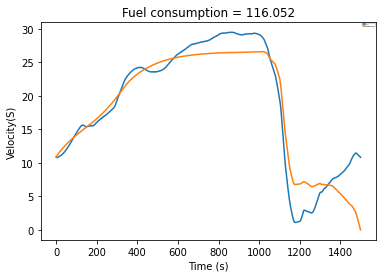

In [11]:
plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_3_2["solution"])
fc = model.F(np.array(sol_3_2["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

10
Objective value =  267.62402376225424
Objective value =  255.5087015270483
Objective value =  254.24242838694585
Objective value =  254.0750308601341
Objective value =  254.75664145758992
Objective value =  254.24250471733708
Objective value =  253.90332049991704
Objective value =  253.73218961061335
Objective value =  254.986828436712
Objective value =  253.6244122645974
Objective value =  253.92868709515034
Objective value =  254.66507159371488
Objective value =  254.11470102440938
Objective value =  254.27465763277044
Objective value =  254.24159320472276
Objective value =  253.92022976245008
Objective value =  253.92513445216238
Objective value =  254.27257552105556
Objective value =  254.0950733012801
Objective value =  254.3658780189976
Objective value =  254.0804874587727
Objective value =  253.93490732776647
Objective value =  253.8145854571816
Objective value =  253.8802349401171
Objective value =  253.92461121649552
Objective value =  253.89279773866332
Objective value =  

Objective value =  254.13299383850833
Objective value =  254.17430743732388
Objective value =  254.20613103870392
Objective value =  254.2477771798898
Objective value =  254.2738736738528
Objective value =  254.28932687034288
Objective value =  254.31046129589396
Objective value =  254.3516330054056
Objective value =  254.3814966810984
Objective value =  254.41957032706802
Objective value =  254.44712573203606
Objective value =  254.45573125461118
Objective value =  254.4500415249147
Objective value =  254.48044911291095
Objective value =  254.42584066062614
Objective value =  254.3995479320672
Objective value =  254.44104262411219
Objective value =  254.4671283292532
Objective value =  254.48931634757014
Objective value =  254.51990372708448
Objective value =  254.55191486648442
Objective value =  254.58129991738485
Objective value =  254.58649479443284
Objective value =  254.60859954711898
Objective value =  254.63099364475946
Objective value =  254.65475588627552
Objective value =  

Objective value =  254.64401742373872
Objective value =  254.64485138776362
Objective value =  254.64198160070876
Objective value =  254.63756983368575
Objective value =  254.63648122947106
Objective value =  254.6377984564421
Objective value =  254.6380782352959
Objective value =  254.64206269532394
Objective value =  254.63842980730325
Objective value =  254.64050143370247
Objective value =  254.64174106547298
Objective value =  254.6453157099788
Objective value =  254.6491741302236
Objective value =  254.64969920437022
Objective value =  254.64780617338232
Objective value =  254.64161916779415
Objective value =  254.64299402252004
Objective value =  254.64325317859502
Objective value =  254.64506466232248
Objective value =  254.6477573784006
Objective value =  254.65035526472272
Objective value =  254.64549988490631
Objective value =  254.6420160763418
Objective value =  254.64504429270778
Objective value =  254.6472503978886
Objective value =  254.64863868260178
Objective value =  

Objective value =  254.46704077759796
Objective value =  254.46731881094638
Objective value =  254.46276088693503
Objective value =  254.46010468862332
Objective value =  254.46074530674622
Objective value =  254.46128763152785
Objective value =  254.45575733888535
Objective value =  254.4477332639934
Objective value =  254.44639357831042
Objective value =  254.44670616698258
Objective value =  254.44065494113977
Objective value =  254.43908757976453
Objective value =  254.43977808201228
Objective value =  254.4402522672684
Objective value =  254.43749515195867
Objective value =  254.43597721429344
Objective value =  254.43622171794237
Objective value =  254.4347059516164
Objective value =  254.43447052330973
Objective value =  254.4331921981079
Objective value =  254.43246928068044
Objective value =  254.43268183535022
Objective value =  254.43195564388043
Objective value =  254.43250394641407
Objective value =  254.43305492484066
Objective value =  254.43293949800213
Objective value 

Objective value =  254.3087435378588
Objective value =  254.3081552911787
Objective value =  254.30750565745765
Objective value =  254.3070773057374
Objective value =  254.30637961988907
Objective value =  254.30588954421728
Objective value =  254.30680601410154
Objective value =  254.30622190146315
Objective value =  254.3061843150581
Objective value =  254.30577396014144
Objective value =  254.30536988012148
Objective value =  254.304972376781
Objective value =  254.30456639946735
Objective value =  254.30421358369546
Objective value =  254.30277352299063
Objective value =  254.30238927674137
Objective value =  254.3013812231176
Objective value =  254.2983507781424
Objective value =  254.29773846886872
Objective value =  254.29791108991955
Objective value =  254.29858151885966
Objective value =  254.2990396846185
Objective value =  254.29927991514012
Objective value =  254.29666955959883
Objective value =  254.29653920600956
Objective value =  254.29714194718647
Objective value =  25

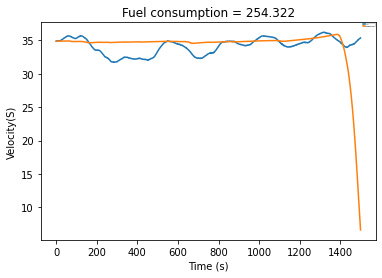

In [8]:
## Original Objective 
i = 1
exp_name = "original_ADAGRAD_{}".format(i)
model = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_3_1 = ADAGRAD_plus(model, max_iterations=max_iterations, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_3_1, out_file, indent = 6) 
out_file.close() 

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_3_1["solution"])
fc = model.F(np.array(sol_3_1["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

Algorithm 4: ADAAGD+

Objective value =  122.10429512890772
time 1.7050790786743164
Objective value =  121.0450593209943
time 1.5172958374023438
Objective value =  119.90929633468795
time 1.7060620784759521
Objective value =  119.10375586693371
time 1.8173089027404785
Objective value =  118.66102490890631
time 1.858025312423706
Objective value =  118.24427439693135
time 1.7701780796051025
Objective value =  117.89403669309858
time 1.6585650444030762
Objective value =  117.57597198681223
time 1.7765288352966309
Objective value =  117.38050650555296
time 1.6232948303222656
Objective value =  117.16398281870391
time 1.6150500774383545
Objective value =  117.00347657271499
time 1.6584727764129639
Objective value =  116.937073404756
time 1.5340778827667236
Objective value =  116.84295427906243
time 1.5476410388946533
Objective value =  116.72608044805237
time 1.899289846420288
Objective value =  116.63555379394796
time 2.0167031288146973
Objective value =  116.55324121153794
time 1.7423090934753418
Objective val

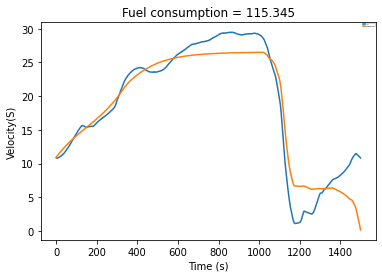

In [8]:
## Original Objective 
i = 2
exp_name = "original_ADAAGD_{}".format(i)
model = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_4_2 = ADAAGD_plus(model, max_iterations=100, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_4_2, out_file, indent = 6) 
out_file.close() 

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_4_2["solution"])
fc = model.F(np.array(sol_4_2["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

Objective value =  255.5087015270483
time 1.5552771091461182
Objective value =  251.44249536003494
time 1.4702568054199219
Objective value =  250.30553883487502
time 1.390235185623169
Objective value =  249.86835014104653
time 1.3745160102844238
Objective value =  250.28854681934388
time 1.3325119018554688
Objective value =  250.67197748311003
time 1.3754570484161377
Objective value =  250.82896035941928
time 1.4588258266448975
Objective value =  250.85057451508925
time 1.3731799125671387
Objective value =  250.80313347452798
time 1.459212064743042
Objective value =  250.88192556551857
time 1.494758129119873
Objective value =  250.76238035314574
time 1.4429728984832764
Objective value =  250.64130785320162
time 1.445070743560791
Objective value =  250.67568138217953
time 1.5219030380249023
Objective value =  250.6639460956655
time 1.5895938873291016
Objective value =  250.61227729110638
time 1.6416780948638916
Objective value =  250.54535126548672
time 1.6547942161560059
Objective valu

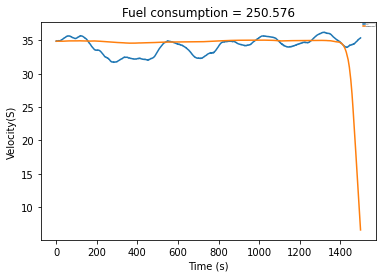

In [9]:
## Original Objective 
i = 1
exp_name = "original_ADAAGD_{}".format(i)
model = OptimalControl(data[i]["time"], data[i]["y0"][0], data[i]["y0"][1], data[i]["xl"], data[i]["vl"])
A, b = model.constraints()
sol_4_1 = ADAAGD_plus(model, max_iterations=100, epsilon=epsilon, x0=data[i]["u0"], A = A.T, b = b, R = 10)


out_file = open("results/{}.json".format(exp_name), "w") 
json.dump(sol_4_1, out_file, indent = 6) 
out_file.close() 

plt.plot(data[i]["vl"])
X, V = model.system_solve(sol_4_1["solution"])
fc = model.F(np.array(sol_4_1["solution"]))
plt.plot(V)
plt.legend(["Leader", "Optimal follower"], fontsize = 1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity(S)")
plt.title("Fuel consumption = {}".format(np.round(fc, 3)))
plt.savefig("results/{}.png".format(exp_name), dpi = 300)

## Plotting

In [8]:
files = glob.glob("results/*.json")
figure = plt.figure()
for i, file in enumerate(files): 
    with open("myfile.json") as json_file:
        res = json.load(json_file)
        plt.plot(res["f"])
        
        
        
